In [71]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler, Normalizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.cm as cm

In [72]:
data = pd.read_csv('categorical.csv')
print(data.shape)
data.head()

(2922, 75)


,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,HasFence,GrLivArea_winsor,avg_price_at_neighborhood
0,20,RL,141.0,31770,1,IR1,Lvl,AllPub,Corner,Gtl,...,NoFence,0,5,2010,WD,Normal,215000,0,1656,145097.349887
1,20,RH,80.0,11622,1,Reg,Lvl,AllPub,Inside,Gtl,...,MnPrv,0,6,2010,WD,Normal,105000,1,896,145097.349887
2,20,RL,81.0,14267,1,IR1,Lvl,AllPub,Corner,Gtl,...,NoFence,12500,6,2010,WD,Normal,172000,0,1329,145097.349887
3,20,RL,93.0,11160,1,Reg,Lvl,AllPub,Corner,Gtl,...,NoFence,0,4,2010,WD,Normal,244000,0,2110,145097.349887
4,60,RL,74.0,13830,1,IR1,Lvl,AllPub,Inside,Gtl,...,MnPrv,0,3,2010,WD,Normal,189900,1,1629,190646.575758


In [73]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
ordinal_features = [
    'Lot Shape',
    'Utilities',
    'Land Slope',
    'Exter Qual',
    'Exter Cond',
    'Heating QC',
    'Electrical',
    'Functional',
    'Paved Drive',
    'Bsmt Exposure',
       'BsmtFin Type 1', 
       'BsmtFin Type 2',
       'Garage Finish',
       'Fence'
]
nominal_features = [
    'MS Zoning',
    'Land Contour',
    'Lot Config',
    'Condition 1',
    'Condition 2',
    'Bldg Type',
    'House Style',
    'Heating',
    'Roof Style',
    'Roof Matl',
    'Exterior 1st',
    'Exterior 2nd',
    'Foundation',
    'Garage Type',
    'Sale Type', 'Sale Condition'
]
# df_encoded = data.copy()

# # Ordinal encoding
# oe = OrdinalEncoder()
# for col in ordinal_features:
#   df_encoded[col] = oe.fit_transform(df_encoded[col].values.reshape(-1, 1))

# df_encoded.sample(10)

# # Nominal encoding
# ohe = OneHotEncoder(drop="first", sparse_output=False)
# encoded = ohe.fit_transform(df_encoded[nominal_features])

# ohe_encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(nominal_features), index=df_encoded.index)

# data = pd.concat([df_encoded.drop(columns=nominal_features), ohe_encoded_df], axis=1)

# data.sample(5)

In [74]:
X = data.copy()
X = data.drop(["SalePrice"], axis='columns')
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

print("Categorical:", cat_cols)
print("Numeric:", num_cols)

Categorical: ['MS Zoning', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Foundation', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Electrical', 'Functional', 'Garage Type', 'Garage Finish', 'Paved Drive', 'Fence', 'Sale Type', 'Sale Condition']
Numeric: ['MS SubClass', 'Lot Frontage', 'Lot Area', 'Street', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating QC', 'Central Air', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', 

In [75]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

ordinal_pipeline = Pipeline([
    ("ord_enc", OrdinalEncoder()),
    ("scale", MinMaxScaler())
])

numeric_pipeline = Pipeline([
    ("scale", MinMaxScaler())
])

nominal_pipeline = Pipeline([
    ("ohe", OneHotEncoder(drop="first", handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, num_cols),
        ("ord", ordinal_pipeline, ordinal_features),
        ("nom", nominal_pipeline, nominal_features)
    ]
)

In [76]:
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X[num_cols])
# X_scaled.shape
X_processed = preprocessor.fit_transform(X)
print(X_processed.shape)

(2922, 171)


In [77]:
feature_names = preprocessor.get_feature_names_out()
X_processed_df = pd.DataFrame(X_processed, columns=feature_names)
cat_cols = X_processed_df.select_dtypes(include=["object", "category"]).columns.tolist()
numerical = X_processed_df.select_dtypes(include=[np.number]).columns.tolist()
print(cat_cols)
print(numerical)

[]
['num__MS SubClass', 'num__Lot Frontage', 'num__Lot Area', 'num__Street', 'num__Overall Qual', 'num__Overall Cond', 'num__Year Built', 'num__Year Remod/Add', 'num__Exter Qual', 'num__Exter Cond', 'num__Bsmt Qual', 'num__Bsmt Cond', 'num__BsmtFin SF 1', 'num__BsmtFin SF 2', 'num__Bsmt Unf SF', 'num__Total Bsmt SF', 'num__Heating QC', 'num__Central Air', 'num__1st Flr SF', 'num__2nd Flr SF', 'num__Low Qual Fin SF', 'num__Gr Liv Area', 'num__Bsmt Full Bath', 'num__Bsmt Half Bath', 'num__Full Bath', 'num__Half Bath', 'num__Bedroom AbvGr', 'num__Kitchen AbvGr', 'num__Kitchen Qual', 'num__TotRms AbvGrd', 'num__Garage Yr Blt', 'num__Garage Cars', 'num__Garage Area', 'num__Garage Qual', 'num__Garage Cond', 'num__Wood Deck SF', 'num__Open Porch SF', 'num__Enclosed Porch', 'num__3Ssn Porch', 'num__Screen Porch', 'num__Misc Val', 'num__Mo Sold', 'num__Yr Sold', 'num__HasFence', 'num__GrLivArea_winsor', 'num__avg_price_at_neighborhood', 'ord__Lot Shape', 'ord__Utilities', 'ord__Land Slope', 'or

In [78]:
pca = PCA(n_components=0.98)
X_pca = pca.fit_transform(X_processed)

print("New shape:", X_pca.shape)
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative explained variance:", np.cumsum(pca.explained_variance_ratio_))
print("Total explained variance:", np.sum(pca.explained_variance_ratio_))

New shape: (2922, 87)
Explained variance ratio: [0.16183914 0.08708635 0.05774722 0.04484464 0.03945823 0.03638605
 0.03390482 0.03239222 0.03024972 0.02807362 0.02634144 0.0257884
 0.02345501 0.02055112 0.01889451 0.01768788 0.01613087 0.01439358
 0.01392886 0.0125801  0.01171799 0.01092774 0.01075202 0.0101035
 0.00869127 0.00802513 0.00775772 0.00752899 0.00737357 0.0072268
 0.00675598 0.00657147 0.00597375 0.00574302 0.00566035 0.00537195
 0.00508944 0.00499854 0.00485657 0.00457439 0.0043228  0.00420507
 0.0040057  0.00388724 0.00378553 0.00364292 0.00363742 0.00355115
 0.00342469 0.00313041 0.00306471 0.00287998 0.00278776 0.00241421
 0.00235398 0.00230218 0.00223231 0.00212247 0.00203591 0.00191148
 0.0018438  0.00169612 0.0015928  0.00154373 0.00151191 0.00149523
 0.00144803 0.00138228 0.00134805 0.00127756 0.00123298 0.00119538
 0.00116267 0.00110486 0.00107489 0.00102704 0.00100131 0.00097117
 0.00091305 0.0009102  0.00088723 0.00087276 0.00084529 0.00079708
 0.00077588 0.000

In [79]:
cum = np.cumsum(pca.explained_variance_ratio_)

n_98 = np.argmax(cum >= 0.98) + 1
n_95 = np.argmax(cum >= 0.95) + 1
n_90 = np.argmax(cum >= 0.90) + 1
n_80 = np.argmax(cum >= 0.80) + 1

print("Components for 98% variance:", n_98)
print("Components for 95% variance:", n_95)
print("Components for 90% variance:", n_90)
print("Components for 80% variance:", n_80)


Components for 98% variance: 87
Components for 95% variance: 61
Components for 90% variance: 44
Components for 80% variance: 26


In [80]:
pca_n_95 = PCA(n_components=n_95)
pca_n_90 = PCA(n_components=n_90)
pca_n_80 = PCA(n_components=n_80)

X_pca_95 = pca_n_95.fit_transform(X_processed)
X_pca_90 = pca_n_90.fit_transform(X_processed)
X_pca_80 = pca_n_80.fit_transform(X_processed)

print("Shapes: ", X_pca_95.shape, X_pca_90.shape, X_pca_80.shape)

Shapes:  (2922, 61) (2922, 44) (2922, 26)


**Elbow, silhoutte, scatter for 80%**

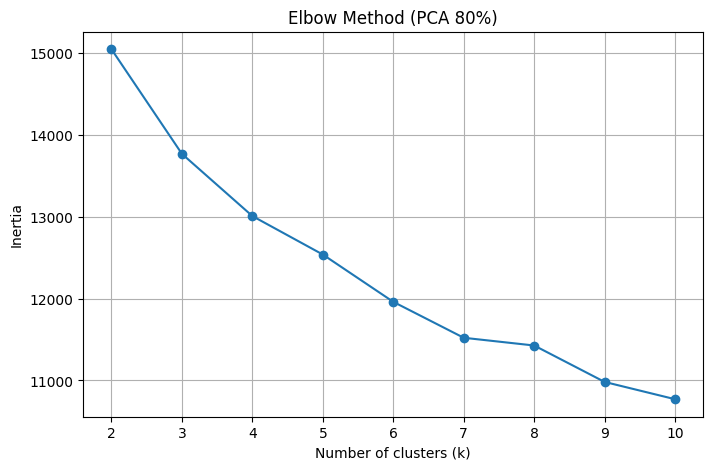

In [81]:
# elbow method for k=range 2-10

inertias = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_pca_80)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o')
plt.title('Elbow Method (PCA 80%)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()

In [82]:
for k, inertia in zip(k_values, inertias):
    print(k, inertia)
drops = []

for i in range(1, len(inertias)):
    drop = inertias[i-1] - inertias[i]
    drops.append(drop)
    print(f"{k_values[i-1]} → {k_values[i]} drop: {drop}")


2 15042.883331509269
3 13765.904549493796
4 13006.529720382561
5 12536.803647882392
6 11959.500812468443
7 11520.929541198082
8 11426.49866141718
9 10981.719697451346
10 10770.87312058626
2 → 3 drop: 1276.9787820154725
3 → 4 drop: 759.3748291112352
4 → 5 drop: 469.7260725001688
5 → 6 drop: 577.3028354139497
6 → 7 drop: 438.57127127036074
7 → 8 drop: 94.43087978090261
8 → 9 drop: 444.7789639658331
9 → 10 drop: 210.8465768650858


3->4 is the biggest drop on pca_80 => k=4

In [83]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
labels = kmeans.fit_predict(X_pca_80)
np.bincount(labels)

array([ 554, 1036,  772,  560])

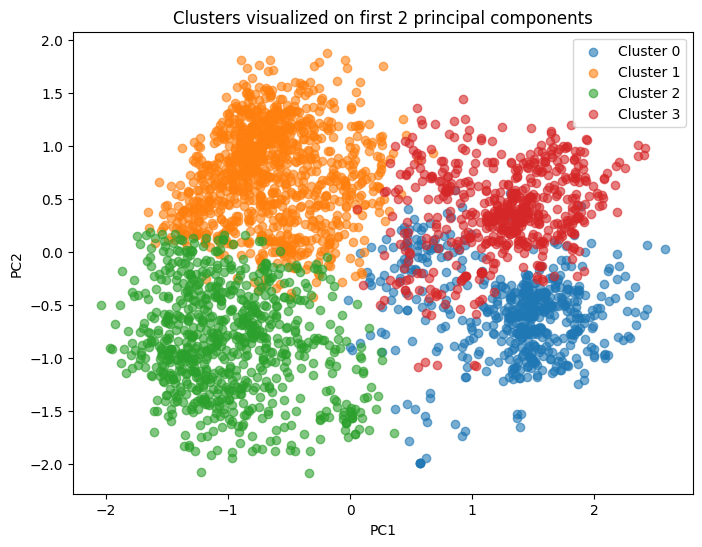

In [84]:
plt.figure(figsize=(8,6))
for cluster in np.unique(labels):
    plt.scatter(
        X_pca_80[labels==cluster, 0], 
        X_pca_80[labels==cluster, 1], 
        label=f"Cluster {cluster}", alpha=0.6
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters visualized on first 2 principal components")
plt.legend()
plt.show()


in dreapta (pe axa P1) sunt case cu o fundatie+exterior mai bun, deci accentul se pune pe calitate
cele din sus (pe axa P2) sunt case cu un etaj si garaj atasat

Foundation_PConc             0.412100
Exterior 1st_VinylSd         0.366142
Exterior 2nd_VinylSd         0.362898
Foundation_CBlock           -0.300800
Year Remod/Add               0.251880
Garage Type_Detchd          -0.232306
Garage Finish               -0.225771
Garage Type_Attchd           0.219404
avg_price_at_neighborhood    0.190972
Year Built                   0.172779
Name: PC1, dtype: float64


House Style_1Story    0.332012
Garage Type_Attchd    0.291452
House Style_2Story   -0.243261
MS Zoning_RL          0.240482
Foundation_CBlock     0.213165
Garage Type_Detchd   -0.202084
MS Zoning_RM         -0.183110
BsmtFin Type 1       -0.152070
Roof Style_Hip        0.144590
Roof Style_Gable     -0.141739
Name: PC2, dtype: float64

In [85]:
score = silhouette_score(X_pca_80, labels)
print("Silhouette score:", score)


Silhouette score: 0.12617381390002222


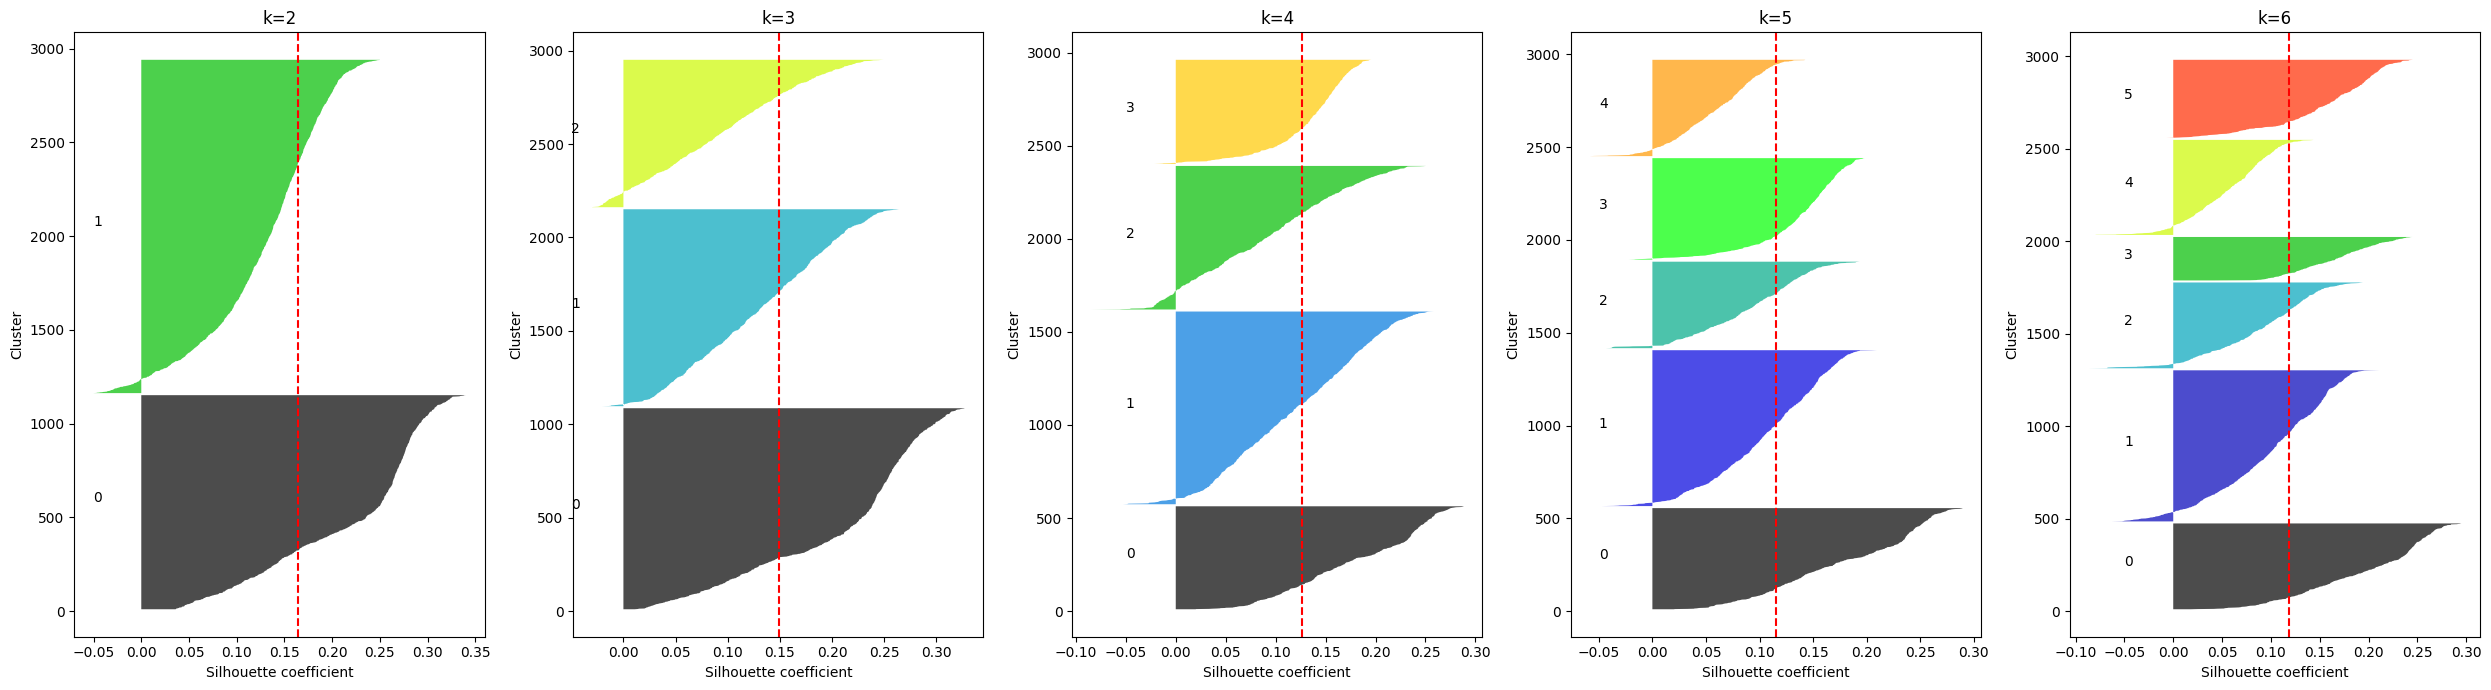

In [86]:
# cluster quality visualization
k_values = [2, 3, 4, 5, 6]
n_k = len(k_values)
fig, axes = plt.subplots(1, n_k, figsize=(5*n_k, 7))

for ax, k in zip(axes, k_values):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(X_pca_80)
    
    silhouette_vals = silhouette_samples(X_pca_80, cluster_labels)
    y_lower = 10
    
    for i in range(k):
        ith_silhouette = silhouette_vals[cluster_labels == i]
        ith_silhouette.sort()
        y_upper = y_lower + len(ith_silhouette)
        color = cm.nipy_spectral(float(i)/k)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_silhouette, facecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5*len(ith_silhouette), str(i))
        y_lower = y_upper + 10
    
    ax.axvline(x=np.mean(silhouette_vals), color="red", linestyle="--")
    ax.set_title(f"k={k}")
    ax.set_xlabel("Silhouette coefficient")
    ax.set_ylabel("Cluster")

plt.tight_layout()
plt.show()

In [87]:
loadings = pca_n_80.components_.T * np.sqrt(pca_n_80.explained_variance_)

In [88]:
loadings_df = pd.DataFrame(
    loadings,
    columns=[f"PC{i+1}" for i in range(loadings.shape[1])],
    index= numerical
)

loadings_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26
num__MS SubClass,-0.002414,-0.101475,-0.062389,-0.051212,0.049656,-0.026628,0.055994,0.045278,-0.000475,-0.029957,...,-0.011632,0.000467,-0.023736,-0.029891,0.100845,-0.028652,-0.017816,0.080072,0.008159,0.048959
num__Lot Frontage,0.015122,0.021626,-0.006309,-0.001850,-0.017330,0.002351,-0.012535,-0.009345,-0.006979,0.002467,...,-0.002900,-0.008535,0.005330,-0.003158,-0.022214,0.002325,-0.001323,0.002306,0.003925,-0.005210
num__Lot Area,0.002882,0.007802,-0.003960,-0.001687,-0.006476,0.001327,-0.006527,0.000504,-0.002244,-0.000716,...,-0.003153,-0.005684,0.002999,0.001053,-0.006258,0.001629,-0.001000,0.000885,-0.000026,-0.000679
num__Street,0.004562,0.000564,-0.002600,0.001173,0.001127,0.000935,0.000425,-0.001717,-0.000008,0.003643,...,0.002953,0.001848,-0.003735,0.000180,-0.001806,-0.000426,0.002820,-0.000092,-0.000167,0.004853
num__Overall Qual,0.111072,0.010405,-0.012254,-0.042452,-0.003609,0.014096,0.001687,0.006650,0.003224,0.026336,...,0.019955,-0.021857,-0.002383,-0.003553,-0.015423,-0.000876,-0.006675,0.025998,-0.001114,-0.004111


In [89]:
def top_features(pc, n=10):
    sorted_loadings = loadings_df[pc].abs().sort_values(ascending=False).head(n)
    return loadings_df[pc].loc[sorted_loadings.index].head(n)

print(top_features("PC1", 10))
print('\n')
print(top_features("PC2", 10))


nom__Foundation_PConc             0.412982
nom__Exterior 1st_VinylSd         0.364549
nom__Exterior 2nd_VinylSd         0.361214
nom__Foundation_CBlock           -0.302692
num__Year Remod/Add               0.253729
nom__Garage Type_Detchd          -0.228917
ord__Garage Finish               -0.225007
nom__Garage Type_Attchd           0.216767
num__avg_price_at_neighborhood    0.191873
num__Year Built                   0.172521
Name: PC1, dtype: float64


nom__House Style_1Story    0.331325
nom__Garage Type_Attchd    0.292847
nom__House Style_2Story   -0.241829
nom__MS Zoning_RL          0.241270
nom__Foundation_CBlock     0.211686
nom__Garage Type_Detchd   -0.203791
nom__MS Zoning_RM         -0.183962
ord__BsmtFin Type 1       -0.152012
nom__Roof Style_Hip        0.144533
nom__Roof Style_Gable     -0.141625
Name: PC2, dtype: float64


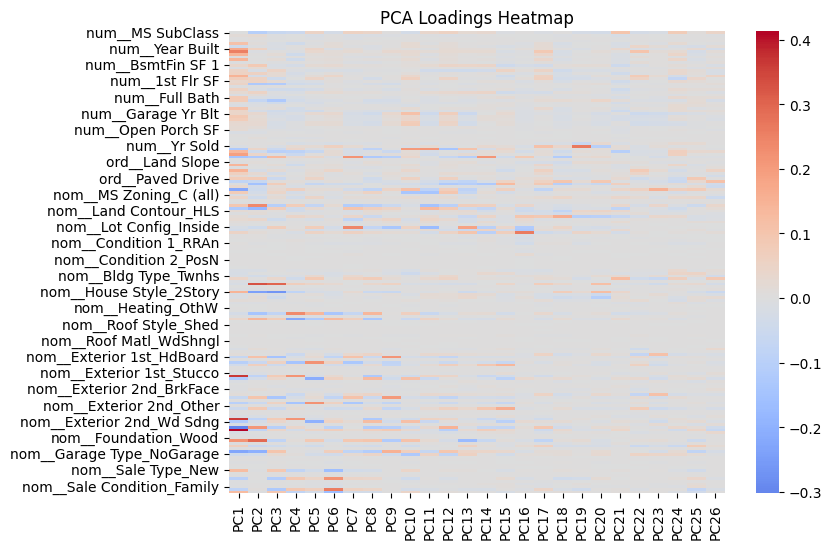

In [90]:
plt.figure(figsize=(8, 6))
sns.heatmap(loadings_df, cmap="coolwarm", center=0)
plt.title("PCA Loadings Heatmap")
plt.show()

**Elbow, silhouette, scatter for 90%**

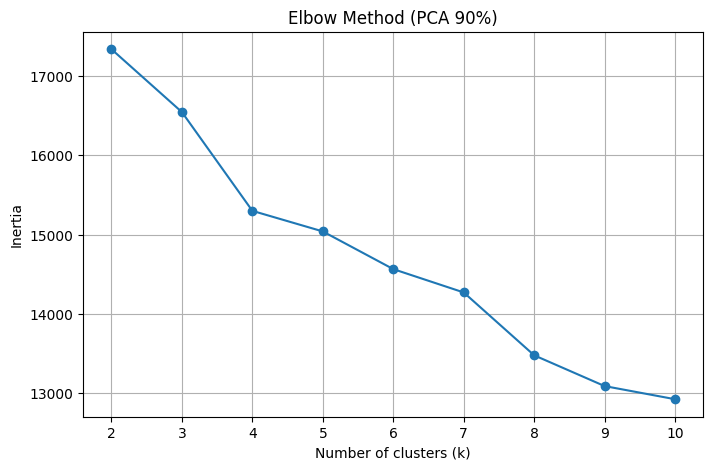

2 17340.694694155667
3 16546.63667173513
4 15298.992750465277
5 15038.998530900939
6 14562.989764995113
7 14268.180286210743
8 13474.225214556745
9 13085.443620925209
10 12919.57685668429
2 → 3 drop: 794.0580224205369
3 → 4 drop: 1247.6439212698533
4 → 5 drop: 259.994219564338
5 → 6 drop: 476.0087659058263
6 → 7 drop: 294.8094787843693
7 → 8 drop: 793.955071653998
8 → 9 drop: 388.78159363153645
9 → 10 drop: 165.8667642409182


In [91]:
# elbow method for k=range 2-10

inertias = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_pca_90)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o')
plt.title('Elbow Method (PCA 90%)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()
for k, inertia in zip(k_values, inertias):
    print(k, inertia)
drops = []

for i in range(1, len(inertias)):
    drop = inertias[i-1] - inertias[i]
    drops.append(drop)
    print(f"{k_values[i-1]} → {k_values[i]} drop: {drop}")


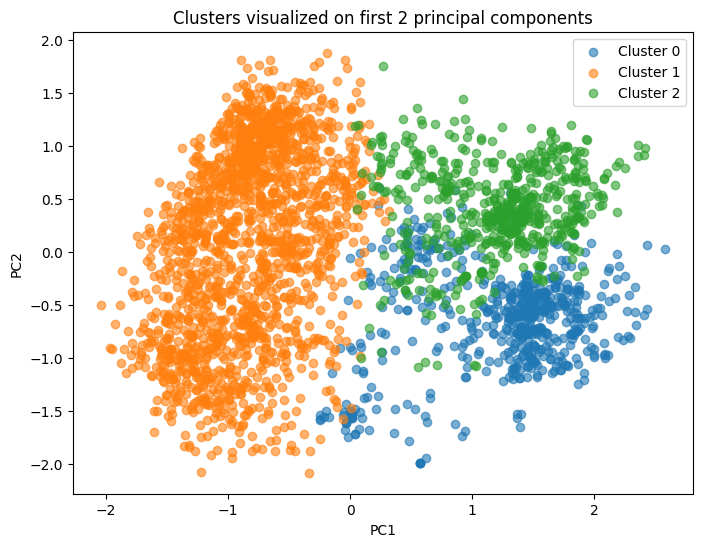

In [92]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
labels = kmeans.fit_predict(X_pca_90)
np.bincount(labels)
plt.figure(figsize=(8,6))
for cluster in np.unique(labels):
    plt.scatter(
        X_pca_90[labels==cluster, 0], 
        X_pca_90[labels==cluster, 1], 
        label=f"Cluster {cluster}", alpha=0.6
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters visualized on first 2 principal components")
plt.legend()
plt.show()


nom__Foundation_PConc             0.412982
nom__Exterior 1st_VinylSd         0.364549
nom__Exterior 2nd_VinylSd         0.361214
nom__Foundation_CBlock           -0.302692
num__Year Remod/Add               0.253729
nom__Garage Type_Detchd          -0.228917
ord__Garage Finish               -0.225007
nom__Garage Type_Attchd           0.216767
num__avg_price_at_neighborhood    0.191873
num__Year Built                   0.172521
Name: PC1, dtype: float64


nom__House Style_1Story    0.331325
nom__Garage Type_Attchd    0.292847
nom__House Style_2Story   -0.241829
nom__MS Zoning_RL          0.241270
nom__Foundation_CBlock     0.211686
nom__Garage Type_Detchd   -0.203791
nom__MS Zoning_RM         -0.183962
ord__BsmtFin Type 1       -0.152012
nom__Roof Style_Hip        0.144533
nom__Roof Style_Gable     -0.141625
Name: PC2, dtype: float64

Silhouette score: 0.10149495683720082


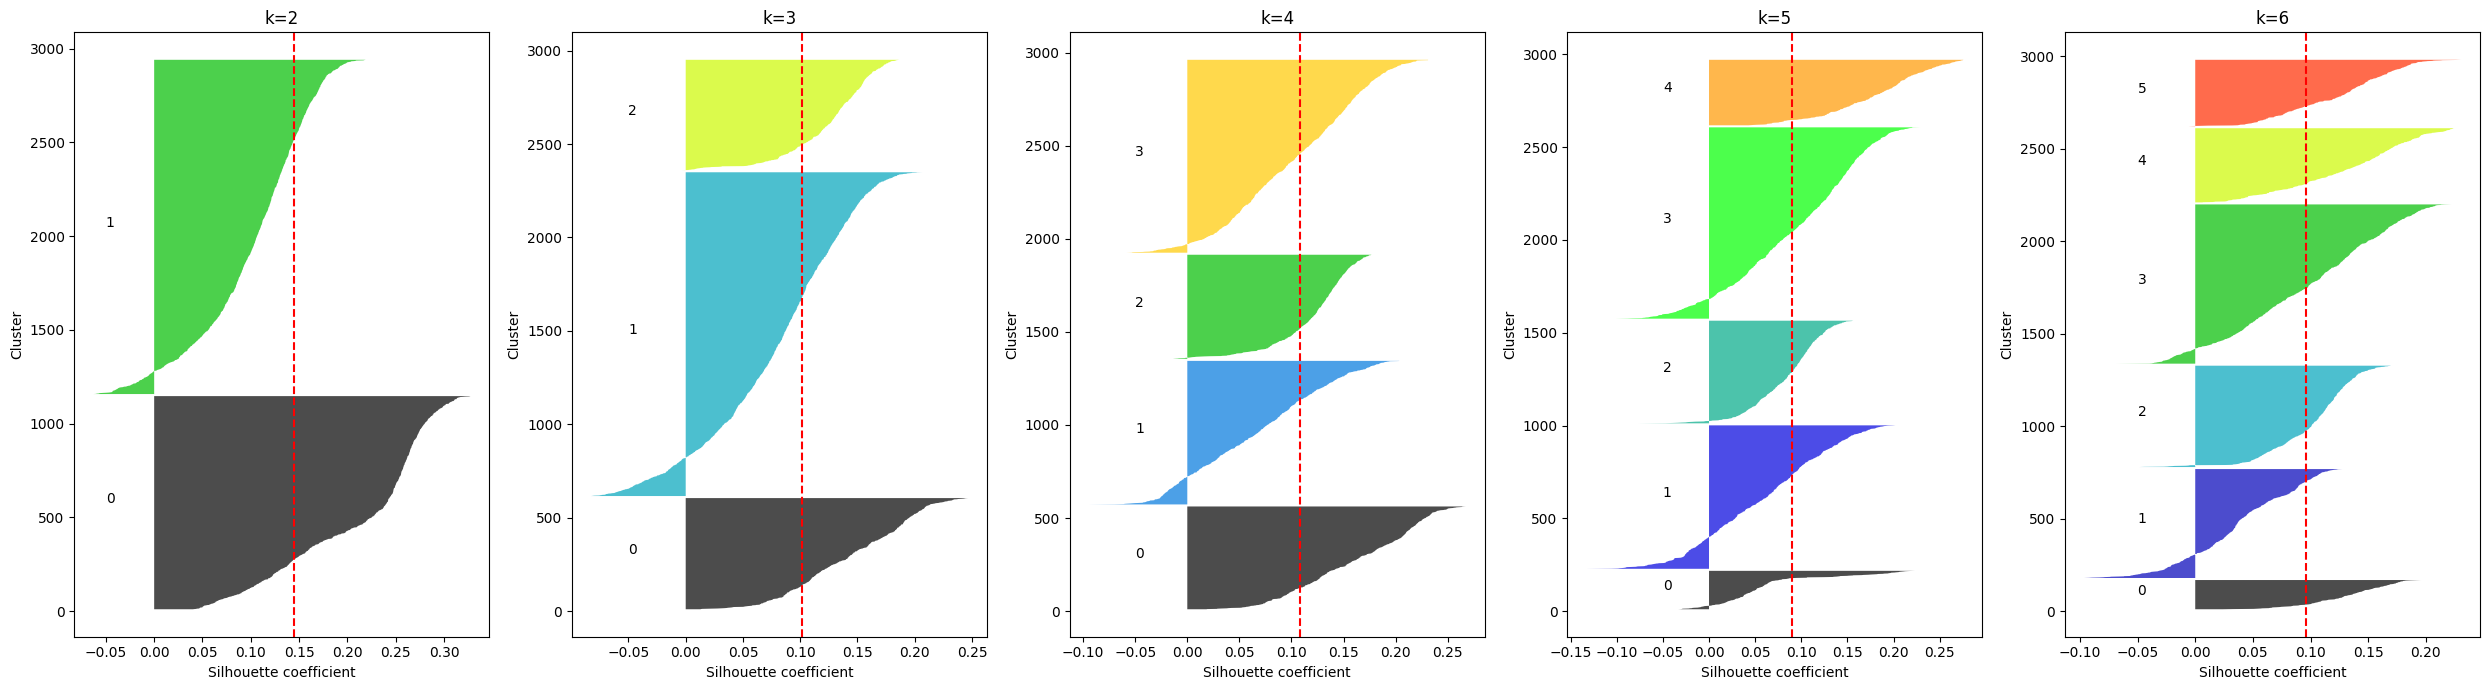

In [93]:
score = silhouette_score(X_pca_90, labels)
print("Silhouette score:", score)
# cluster quality visualization
k_values = [2, 3, 4, 5, 6]
n_k = len(k_values)
fig, axes = plt.subplots(1, n_k, figsize=(5*n_k, 7))

for ax, k in zip(axes, k_values):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(X_pca_90)
    
    silhouette_vals = silhouette_samples(X_pca_90, cluster_labels)
    y_lower = 10
    
    for i in range(k):
        ith_silhouette = silhouette_vals[cluster_labels == i]
        ith_silhouette.sort()
        y_upper = y_lower + len(ith_silhouette)
        color = cm.nipy_spectral(float(i)/k)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_silhouette, facecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5*len(ith_silhouette), str(i))
        y_lower = y_upper + 10
    
    ax.axvline(x=np.mean(silhouette_vals), color="red", linestyle="--")
    ax.set_title(f"k={k}")
    ax.set_xlabel("Silhouette coefficient")
    ax.set_ylabel("Cluster")

plt.tight_layout()
plt.show()

In [94]:
loadings = pca_n_90.components_.T * np.sqrt(pca_n_90.explained_variance_)
loadings_df = pd.DataFrame(
    loadings,
    columns=[f"PC{i+1}" for i in range(loadings.shape[1])],
    index=numerical 
)

loadings_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44
num__MS SubClass,-0.002414,-0.101475,-0.062389,-0.051212,0.049656,-0.026628,0.055994,0.045278,-0.000475,-0.029957,...,-0.028212,0.000593,0.058175,-0.011543,-0.001380,0.006291,-0.007281,0.000824,-0.005585,-0.010906
num__Lot Frontage,0.015122,0.021626,-0.006309,-0.001850,-0.017330,0.002351,-0.012535,-0.009345,-0.006979,0.002467,...,0.000710,0.007341,-0.008390,0.002334,-0.003148,0.000584,-0.000716,-0.007579,-0.002120,0.001034
num__Lot Area,0.002882,0.007802,-0.003960,-0.001687,-0.006476,0.001327,-0.006527,0.000504,-0.002244,-0.000716,...,-0.000099,0.002707,0.001220,0.002556,-0.001149,-0.001798,0.003400,-0.001099,0.000954,-0.000801
num__Street,0.004562,0.000564,-0.002600,0.001173,0.001127,0.000935,0.000425,-0.001717,-0.000008,0.003643,...,0.001373,-0.005021,-0.000147,0.000441,-0.000725,-0.001440,0.000966,0.002768,0.001865,0.000655
num__Overall Qual,0.111072,0.010405,-0.012254,-0.042452,-0.003609,0.014096,0.001687,0.006650,0.003224,0.026336,...,0.013756,-0.009976,0.003349,-0.008978,-0.000622,0.007517,-0.000352,-0.001242,-0.002676,-0.001227


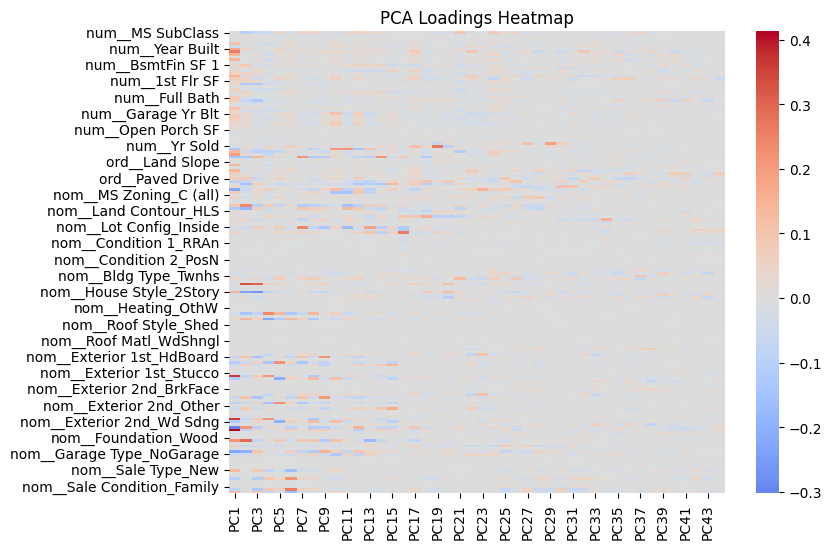

In [95]:
def top_features(pc, n=10):
    return loadings_df[pc].abs().sort_values(ascending=False).head(n)

top_features("PC1", 10)
top_features("PC2", 10)
plt.figure(figsize=(8, 6))
sns.heatmap(loadings_df, cmap="coolwarm", center=0)
plt.title("PCA Loadings Heatmap")
plt.show()

**Elbow, silhouette, scatter for 95%**

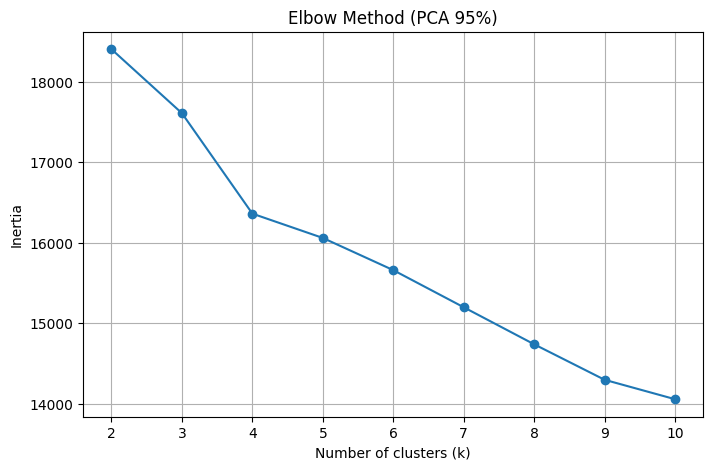

2 18403.364525993064
3 17608.62568181715
4 16360.584278498336
5 16058.551437989572
6 15658.663225954138
7 15197.463577286873
8 14737.282678428955
9 14296.204572514438
10 14054.973085541387
2 → 3 drop: 794.738844175914
3 → 4 drop: 1248.0414033188135
4 → 5 drop: 302.0328405087639
5 → 6 drop: 399.88821203543375
6 → 7 drop: 461.19964866726514
7 → 8 drop: 460.1808988579178
8 → 9 drop: 441.07810591451744
9 → 10 drop: 241.23148697305078


In [96]:
# elbow method for k=range 2-10

inertias = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_pca_95)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o')
plt.title('Elbow Method (PCA 95%)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()
for k, inertia in zip(k_values, inertias):
    print(k, inertia)
drops = []

for i in range(1, len(inertias)):
    drop = inertias[i-1] - inertias[i]
    drops.append(drop)
    print(f"{k_values[i-1]} → {k_values[i]} drop: {drop}")


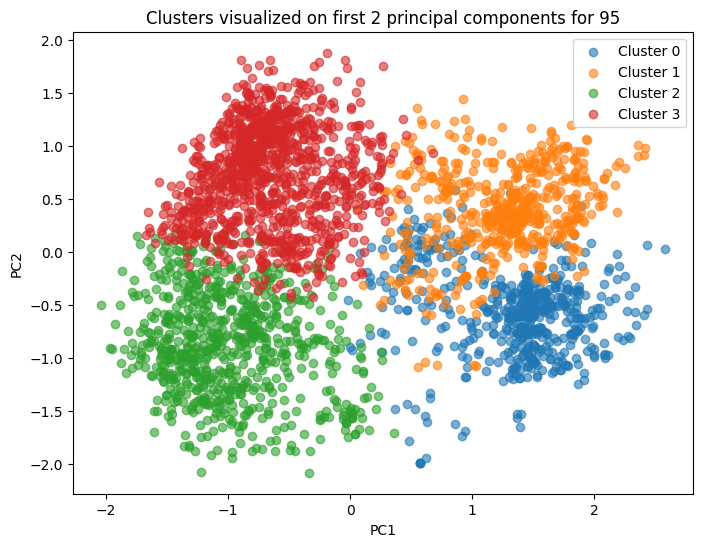

In [97]:
kmeans3d = KMeans(n_clusters=4, random_state=42, n_init='auto')
labels = kmeans3d.fit_predict(X_pca_95)
np.bincount(labels)
plt.figure(figsize=(8,6))
for cluster in np.unique(labels):
    plt.scatter(
        X_pca_95[labels==cluster, 0], 
        X_pca_95[labels==cluster, 1], 
        label=f"Cluster {cluster}", alpha=0.6
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters visualized on first 2 principal components for 95")
plt.legend()
plt.show()


Foundation_PConc             0.412100
Exterior 1st_VinylSd         0.366142
Exterior 2nd_VinylSd         0.362898
Foundation_CBlock           -0.300800
Year Remod/Add               0.251880
Garage Type_Detchd          -0.232306
Garage Finish               -0.225771
Garage Type_Attchd           0.219404
avg_price_at_neighborhood    0.190972
Year Built                   0.172779
Name: PC1, dtype: float64


House Style_1Story    0.332012
Garage Type_Attchd    0.291452
House Style_2Story   -0.243261
MS Zoning_RL          0.240482
Foundation_CBlock     0.213165
Garage Type_Detchd   -0.202084
MS Zoning_RM         -0.183110
BsmtFin Type 1       -0.152070
Roof Style_Hip        0.144590
Roof Style_Gable     -0.141739
Name: PC2, dtype: float64

In [98]:
df = pd.read_csv('AmesHousing.csv', sep='\t')
print(df.shape)
df.head()

(2930, 82)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


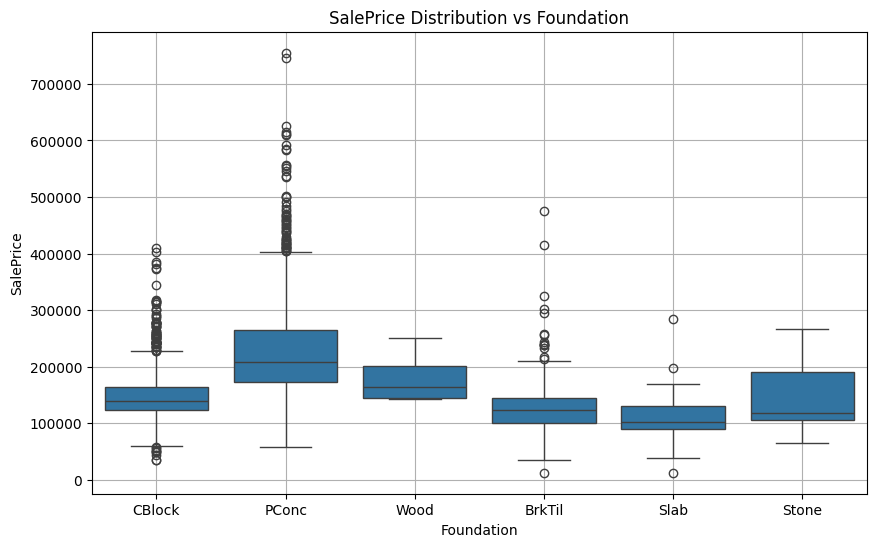

In [99]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Foundation', y='SalePrice')
plt.title("SalePrice Distribution vs Foundation")
plt.xlabel("Foundation")
plt.ylabel("SalePrice")
plt.grid()
plt.show()

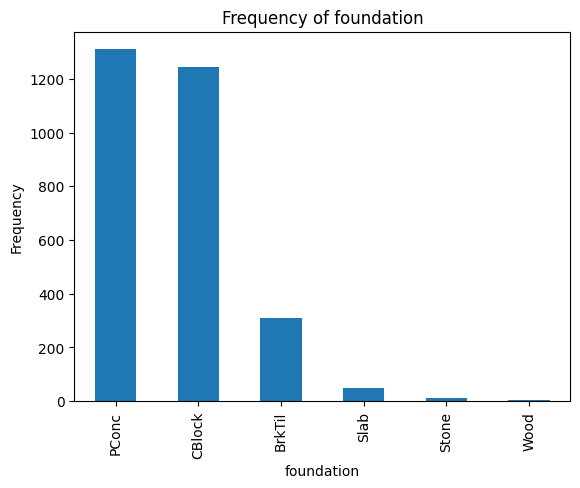

In [100]:

df['Foundation'].value_counts().plot(kind='bar')

plt.xlabel("foundation")
plt.ylabel("Frequency")
plt.title("Frequency of foundation")
plt.show()

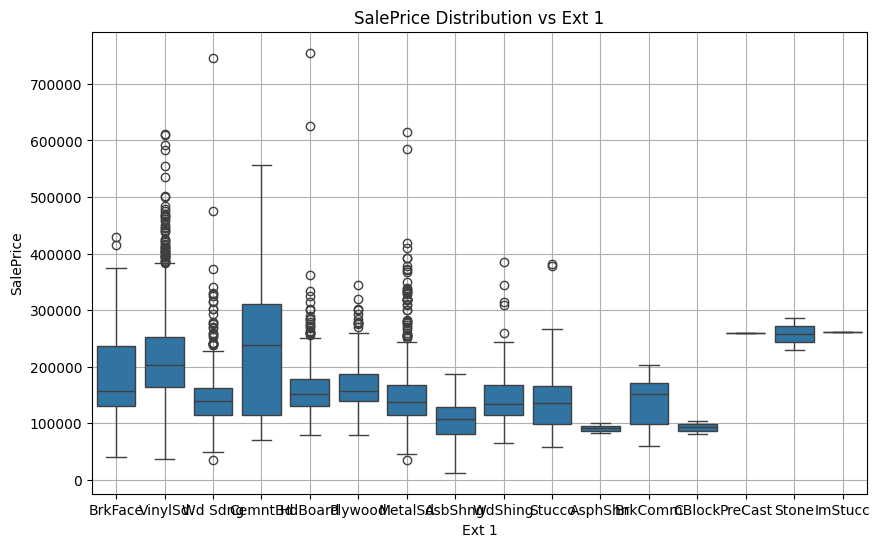

In [101]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Exterior 1st', y='SalePrice')
plt.title("SalePrice Distribution vs Ext 1")
plt.xlabel("Ext 1")
plt.ylabel("SalePrice")
plt.grid()
plt.show()

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

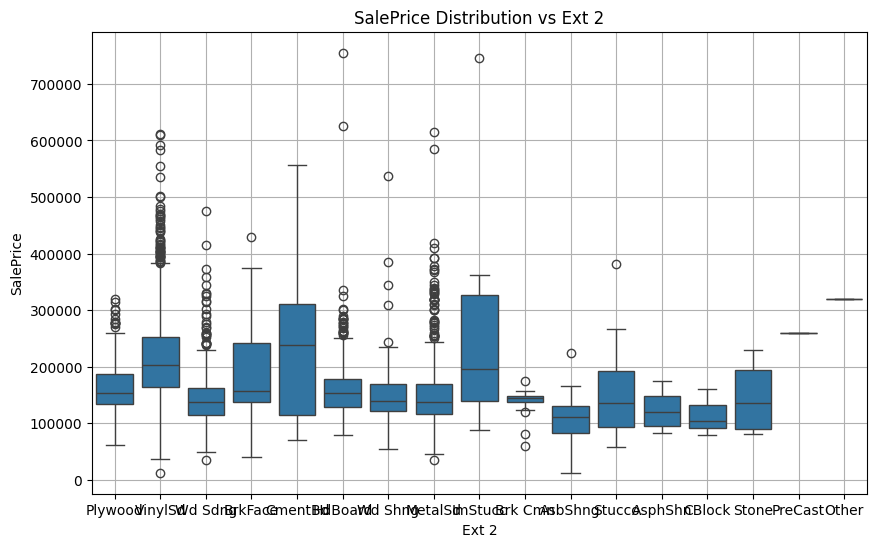

In [102]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Exterior 2nd', y='SalePrice')
plt.title("SalePrice Distribution vs Ext 2")
plt.xlabel("Ext 2")
plt.ylabel("SalePrice")
plt.grid()
plt.show()

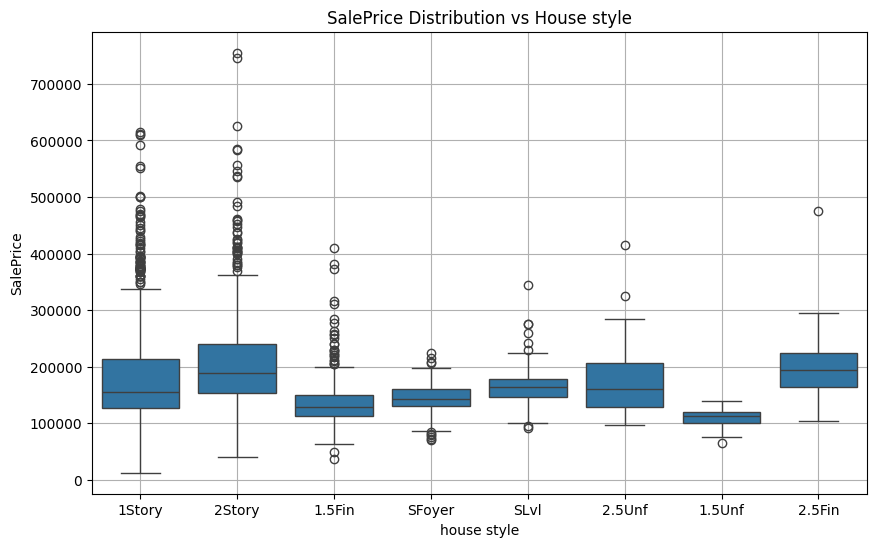

In [103]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='House Style', y='SalePrice')
plt.title("SalePrice Distribution vs House style")
plt.xlabel("house style")
plt.ylabel("SalePrice")
plt.grid()
plt.show()

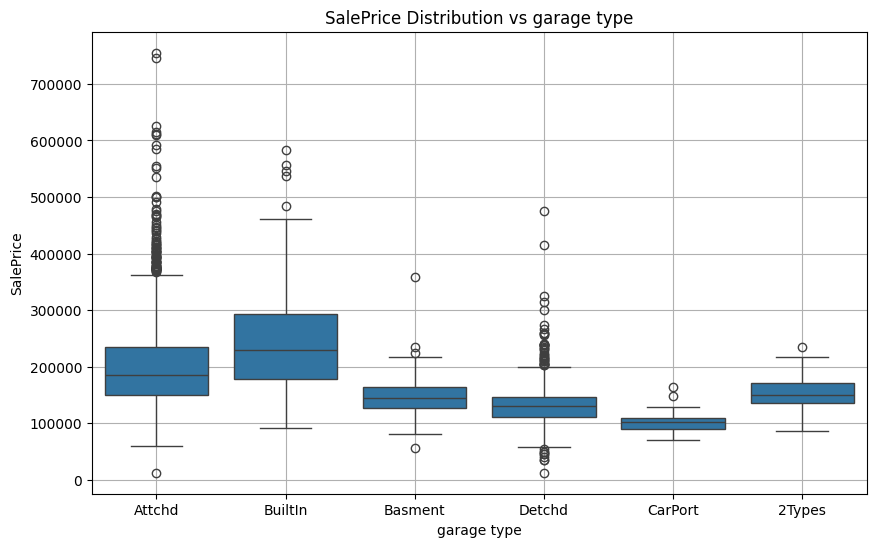

In [104]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Garage Type', y='SalePrice')
plt.title("SalePrice Distribution vs garage type")
plt.xlabel("garage type")
plt.ylabel("SalePrice")
plt.grid()
plt.show()

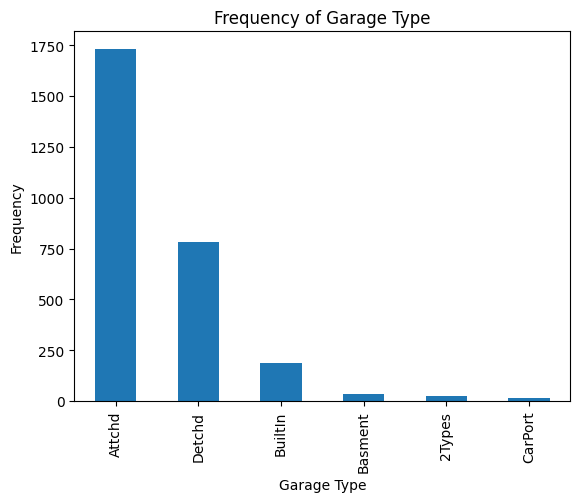

In [105]:
df['Garage Type'].value_counts().plot(kind='bar')

plt.xlabel("Garage Type")
plt.ylabel("Frequency")
plt.title("Frequency of Garage Type")
plt.show()

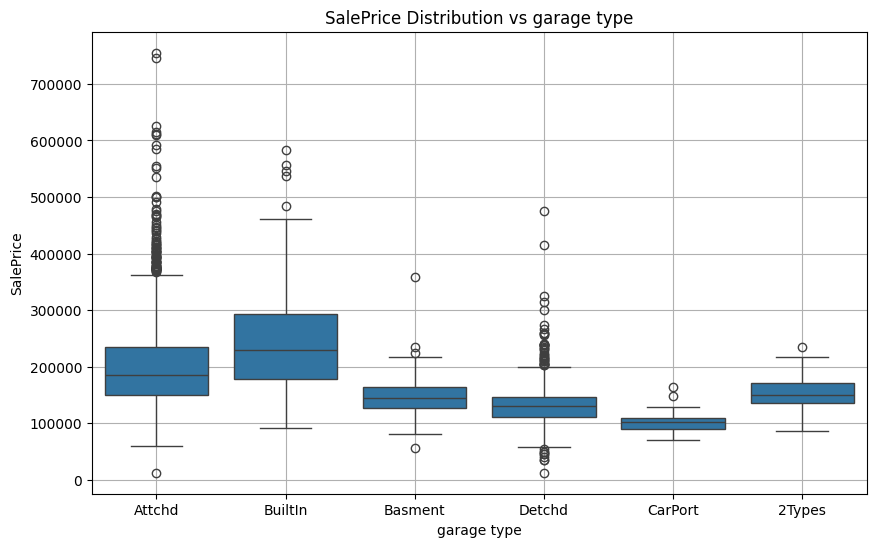

In [106]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Garage Type', y='SalePrice')
plt.title("SalePrice Distribution vs garage type")
plt.xlabel("garage type")
plt.ylabel("SalePrice")
plt.grid()
plt.show()

Silhouette score: 0.10091022866738128


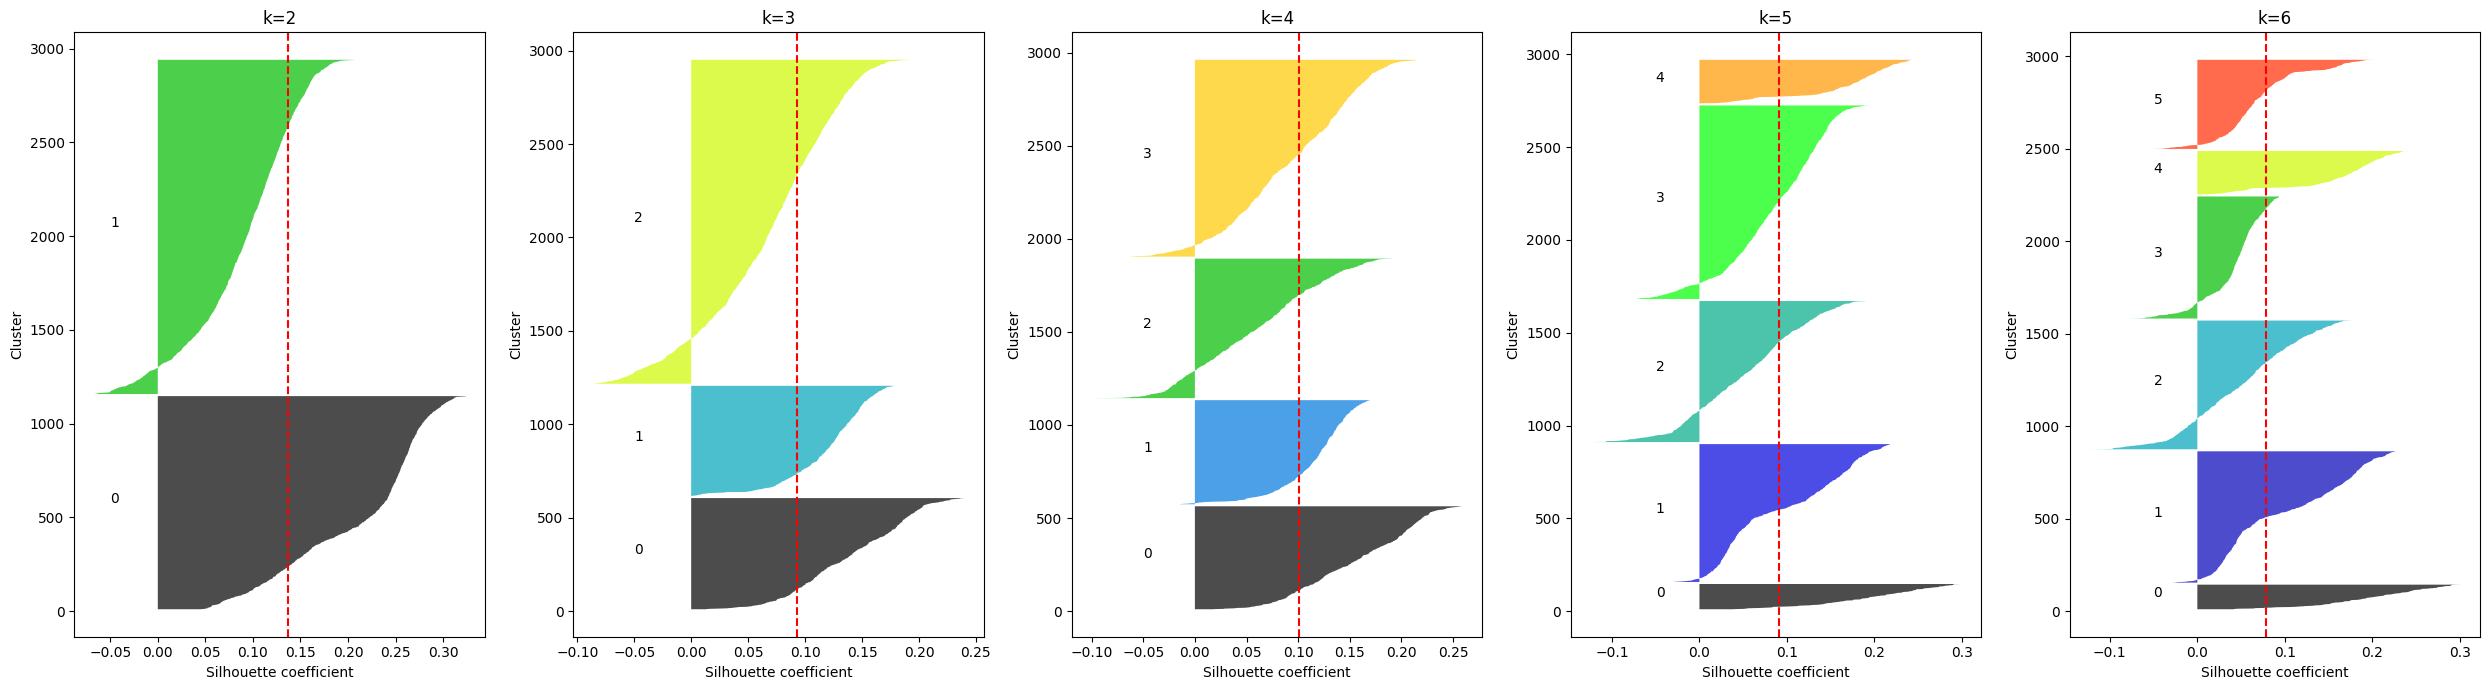

In [107]:
score = silhouette_score(X_pca_95, labels)
print("Silhouette score:", score)
# cluster quality visualization
k_values = [2, 3, 4, 5, 6]
n_k = len(k_values)
fig, axes = plt.subplots(1, n_k, figsize=(5*n_k, 7))

for ax, k in zip(axes, k_values):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(X_pca_95)
    
    silhouette_vals = silhouette_samples(X_pca_95, cluster_labels)
    y_lower = 10
    
    for i in range(k):
        ith_silhouette = silhouette_vals[cluster_labels == i]
        ith_silhouette.sort()
        y_upper = y_lower + len(ith_silhouette)
        color = cm.nipy_spectral(float(i)/k)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_silhouette, facecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5*len(ith_silhouette), str(i))
        y_lower = y_upper + 10
    
    ax.axvline(x=np.mean(silhouette_vals), color="red", linestyle="--")
    ax.set_title(f"k={k}")
    ax.set_xlabel("Silhouette coefficient")
    ax.set_ylabel("Cluster")

plt.tight_layout()
plt.show()

In [108]:
loadings = pca_n_95.components_.T * np.sqrt(pca_n_95.explained_variance_)
loadings_df = pd.DataFrame(
    loadings,
    columns=[f"PC{i+1}" for i in range(loadings.shape[1])],
    index=numerical
)

loadings_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61
num__MS SubClass,-0.002414,-0.101475,-0.062389,-0.051212,0.049656,-0.026628,0.055994,0.045278,-0.000475,-0.029957,...,-0.005315,0.005277,0.005616,0.003429,-0.002462,-0.001537,-0.000650,-0.003177,0.008662,-0.004915
num__Lot Frontage,0.015122,0.021626,-0.006309,-0.001850,-0.017330,0.002351,-0.012535,-0.009345,-0.006979,0.002467,...,-0.008521,0.002404,0.008253,0.008059,-0.004020,-0.006071,0.002941,-0.003951,0.000231,-0.002749
num__Lot Area,0.002882,0.007802,-0.003960,-0.001687,-0.006476,0.001327,-0.006527,0.000504,-0.002244,-0.000716,...,0.002180,0.000350,0.000818,0.003253,-0.000682,-0.004448,-0.000644,-0.000284,-0.000189,0.000453
num__Street,0.004562,0.000564,-0.002600,0.001173,0.001127,0.000935,0.000425,-0.001717,-0.000008,0.003643,...,0.002579,0.000758,-0.003491,-0.000222,0.005182,-0.001874,-0.004052,0.000612,0.003409,-0.000739
num__Overall Qual,0.111072,0.010405,-0.012254,-0.042452,-0.003609,0.014096,0.001687,0.006650,0.003224,0.026336,...,0.000315,-0.006437,-0.001877,-0.000608,-0.001017,0.002686,0.002777,-0.001240,0.004981,0.006285


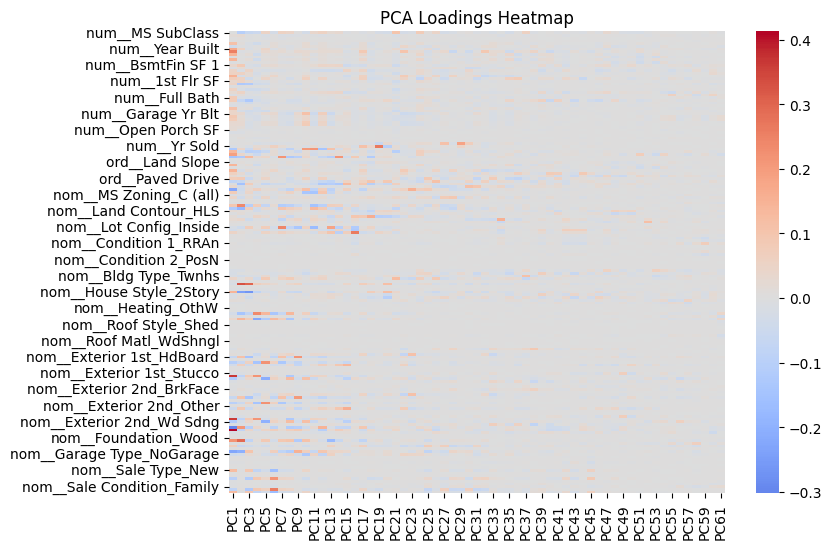

In [109]:
def top_features(pc, n=10):
    return loadings_df[pc].abs().sort_values(ascending=False).head(n)

top_features("PC1", 10)
top_features("PC2", 10)
plt.figure(figsize=(8, 6))
sns.heatmap(loadings_df, cmap="coolwarm", center=0)
plt.title("PCA Loadings Heatmap")
plt.show()

**Elbow, silhouette, scatter for 98%**

Foundation_PConc             0.412100
Exterior 1st_VinylSd         0.366142
Exterior 2nd_VinylSd         0.362898
Foundation_CBlock           -0.300800
Year Remod/Add               0.251880
Garage Type_Detchd          -0.232306
Garage Finish               -0.225771
Garage Type_Attchd           0.219404
avg_price_at_neighborhood    0.190972
Year Built                   0.172779
Name: PC1, dtype: float64


House Style_1Story    0.332012
Garage Type_Attchd    0.291452
House Style_2Story   -0.243261
MS Zoning_RL          0.240482
Foundation_CBlock     0.213165
Garage Type_Detchd   -0.202084
MS Zoning_RM         -0.183110
BsmtFin Type 1       -0.152070
Roof Style_Hip        0.144590
Roof Style_Gable     -0.141739
Name: PC2, dtype: float64

In [110]:
import plotly.graph_objs as go
import numpy as np


X_pca_3 = X_pca_95[:, :3] 
centroids = kmeans3d.cluster_centers_[:, :3] 

clusters = np.unique(labels)

fig = go.Figure()

for cluster in clusters:
    fig.add_trace(go.Scatter3d(
        x=X_pca_3[labels == cluster, 0],
        y=X_pca_3[labels == cluster, 1],
        z=X_pca_3[labels == cluster, 2],
        mode='markers',
        marker=dict(
            size=4,
            opacity=0.7
        ),
        name=f'Cluster {cluster}'
    ))


fig.add_trace(go.Scatter3d(
    x=centroids[:, 0],
    y=centroids[:, 1],
    z=centroids[:, 2],
    mode='markers+text',
    marker=dict(
        size=5,
        color='black',
        symbol='x'
    ),
    text=[f'C{c}' for c in clusters],
    textposition="top center",
    name='Centroids'
))

fig.update_layout(
    title=" 3D PCA-Scatterplot",
    scene=dict(
        xaxis_title="PC1",
        yaxis_title="PC2",
        zaxis_title="PC3"
    ),
    width=900,
    height=700
)

fig.show()


In [111]:
ndata = pd.read_csv('categorical.csv')
ndata.drop("SalePrice", axis = 'columns')
houses1 = ndata[(ndata["Foundation"] == 'PConc') & (ndata["Exterior 1st"] == 'VinylSd') & (ndata["Exterior 2nd"] == 'VinylSd') & (ndata["Garage Type"] == 'Attchd') & (ndata["House Style"] == '1Story') & (ndata["MS Zoning"] == 'RL') ]
len(houses1)
house_c1 = houses1.iloc[0]
house_c1['HasFence'] = 1
house_c1['GrLivArea_winsor'] = 5000
house_c1['Lot Shape'] = 'IR2'
house_c1['Land Contour'] = 'Bnk'
house_c1['Lot Area'] = 20931
print(house_c1)

MS SubClass                            20
MS Zoning                              RL
Lot Frontage                         98.0
Lot Area                            20931
Street                                  1
                                 ...     
Sale Condition                     Normal
SalePrice                          306000
HasFence                                1
GrLivArea_winsor                     5000
avg_price_at_neighborhood    322018.26506
Name: 35, Length: 75, dtype: object


/var/folders/jj/6h9792fx0vqg0d89k8d7cv4m0000gn/T/ipykernel_16012/3726277169.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/jj/6h9792fx0vqg0d89k8d7cv4m0000gn/T/ipykernel_16012/3726277169.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/jj/6h9792fx0vqg0d89k8d7cv4m0000gn/T/ipykernel_16012/3726277169.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/jj/6h9792fx0vqg0d89k8d7cv4m0000gn/T/ipyker

In [112]:
houses2 = ndata[(ndata["Foundation"] == 'PConc') & (ndata["Exterior 1st"] == 'VinylSd') & (ndata["Exterior 2nd"] == 'VinylSd') & (ndata["Garage Type"] == 'Detchd') & (ndata["House Style"] == '2Story') & (ndata["MS Zoning"] == 'FV') ]
len(houses2)
house_c2 = houses2.iloc[0]
house_c2['HasFence'] = 1
house_c2['GrLivArea_winsor'] = 1000
house_c2['Lot Shape'] = 'Reg'
house_c2['Land Contour'] = 'Hls'
house_c2['Lot Area'] = 10000
print(house_c2)

MS SubClass                            160
MS Zoning                               FV
Lot Frontage                          24.0
Lot Area                             10000
Street                                   1
                                 ...      
Sale Condition                      Normal
SalePrice                           152000
HasFence                                 1
GrLivArea_winsor                      1000
avg_price_at_neighborhood    229707.324176
Name: 96, Length: 75, dtype: object


/var/folders/jj/6h9792fx0vqg0d89k8d7cv4m0000gn/T/ipykernel_16012/1359258955.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/jj/6h9792fx0vqg0d89k8d7cv4m0000gn/T/ipykernel_16012/1359258955.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/jj/6h9792fx0vqg0d89k8d7cv4m0000gn/T/ipykernel_16012/1359258955.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/jj/6h9792fx0vqg0d89k8d7cv4m0000gn/T/ipyker

In [113]:
houses3 = ndata[(ndata["Foundation"] == 'CBlock') & (ndata["Exterior 1st"] == 'MetalSd') & (ndata["Year Remod/Add"] > 2000) & (ndata["Garage Type"] == 'Attchd') & (ndata["House Style"] == '1Story') & (ndata["MS Zoning"] == 'RL') ]
len(houses3)
house_c3 = houses3.iloc[0]
house_c3['HasFence'] = 1
house_c3['GrLivArea_winsor'] = 5000
house_c3['Lot Shape'] = 'IR3'
house_c3['Land Contour'] = 'Low'
house_c3['Lot Area'] = 10000
print(house_c3)

MS SubClass                             20
MS Zoning                               RL
Lot Frontage                          80.0
Lot Area                             10000
Street                                   1
                                 ...      
Sale Condition                      Normal
SalePrice                           318750
HasFence                                 1
GrLivArea_winsor                      5000
avg_price_at_neighborhood    252589.130435
Name: 572, Length: 75, dtype: object


/var/folders/jj/6h9792fx0vqg0d89k8d7cv4m0000gn/T/ipykernel_16012/4051526135.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/jj/6h9792fx0vqg0d89k8d7cv4m0000gn/T/ipykernel_16012/4051526135.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/jj/6h9792fx0vqg0d89k8d7cv4m0000gn/T/ipykernel_16012/4051526135.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/jj/6h9792fx0vqg0d89k8d7cv4m0000gn/T/ipyker

In [114]:
new_houses = pd.DataFrame([house_c1, house_c2, house_c3])

In [115]:
new_processed = preprocessor.transform(new_houses)

Xnew_pca_95 = pca_n_95.transform(new_processed)
new_labels = kmeans.predict(Xnew_pca_95)
print(new_labels)

[1 0 3]


/Users/carlachira/anaconda3/envs/ml_env/lib/python3.14/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros



Skewed Features:  Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Street', 'Exter Cond',
       'Bsmt Cond', 'BsmtFin SF 2', 'Central Air', 'Low Qual Fin SF',
       'Bsmt Half Bath', 'Kitchen AbvGr', 'Garage Yr Blt', 'Garage Qual',
       'Garage Cond', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
       '3Ssn Porch', 'Screen Porch', 'Misc Val', 'HasFence',
       'avg_price_at_neighborhood'],
      dtype='object')


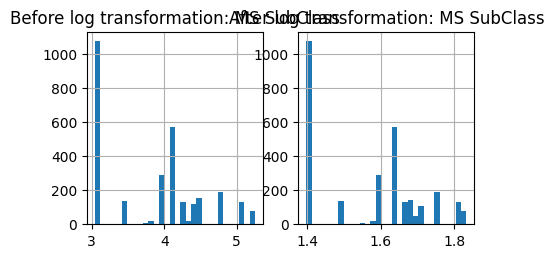

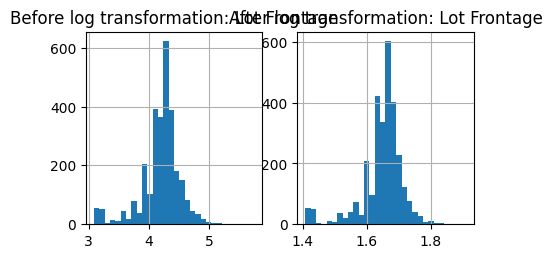

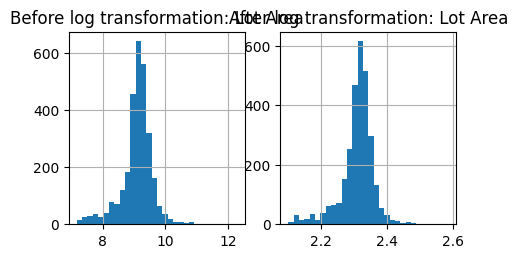

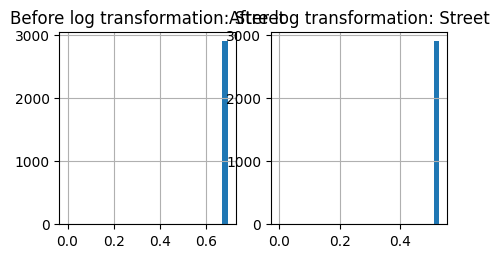

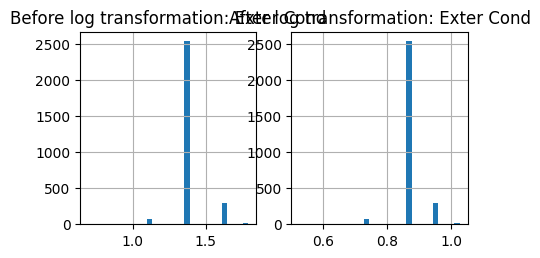

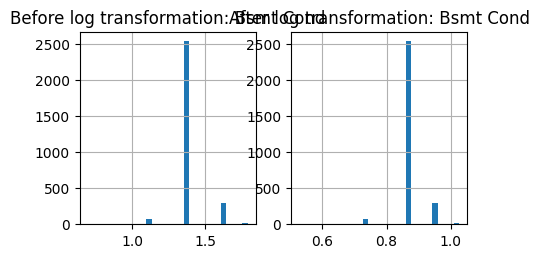

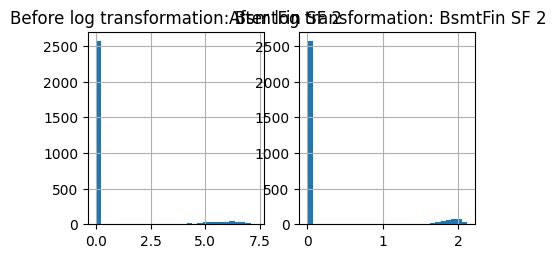

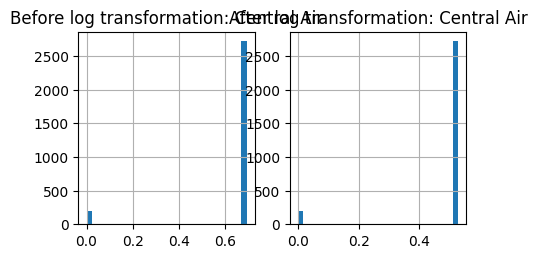

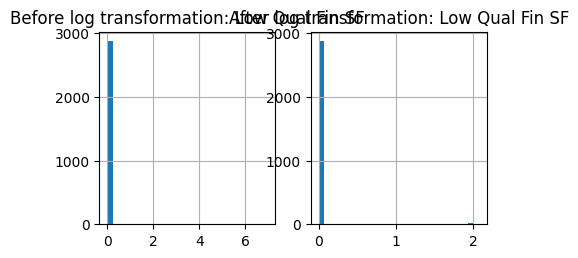

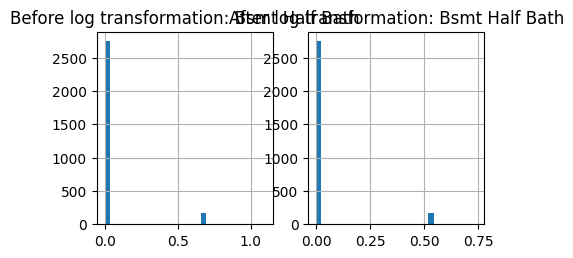

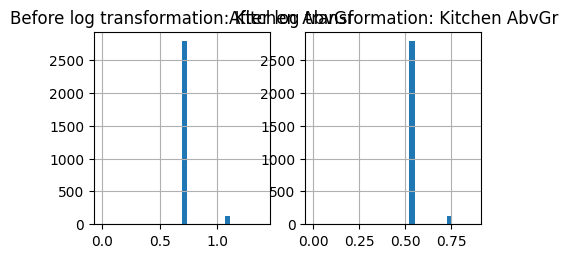

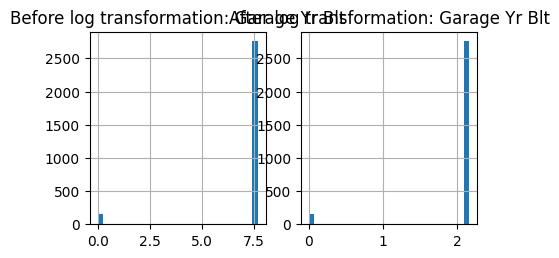

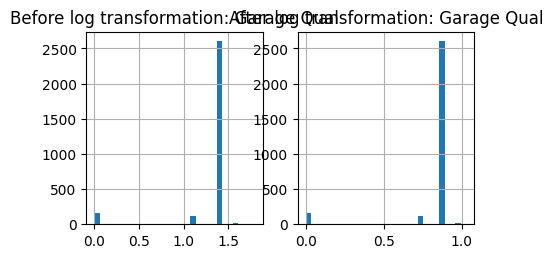

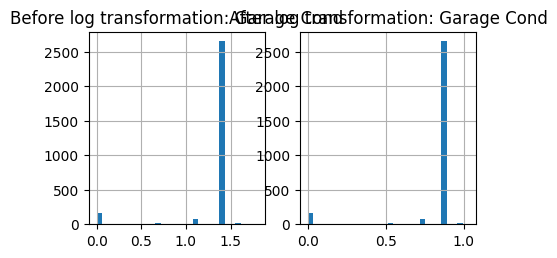

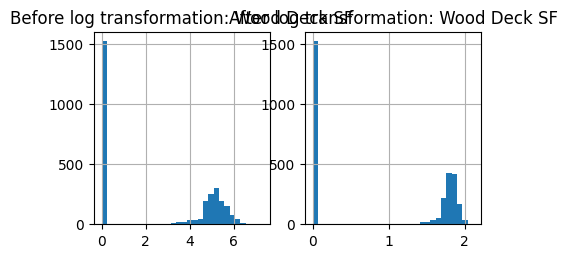

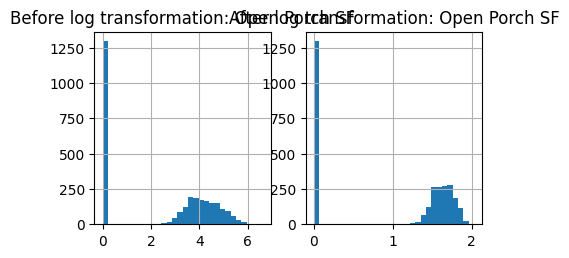

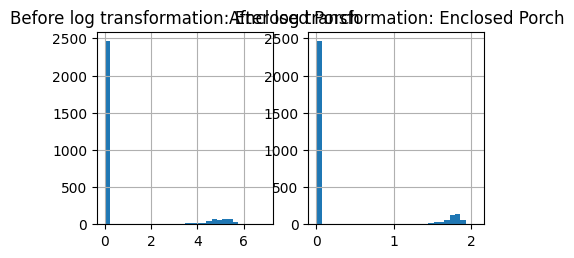

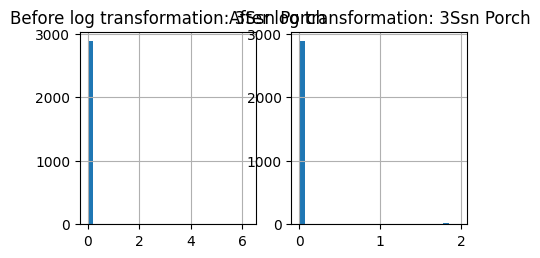

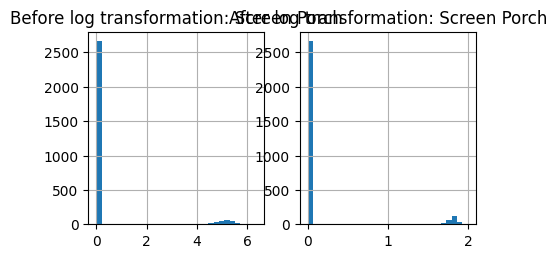

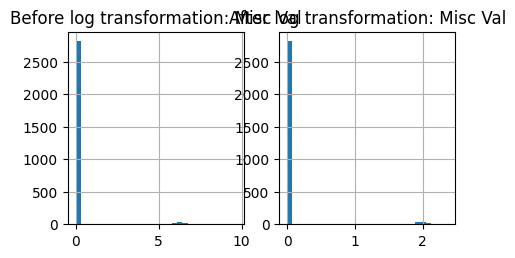

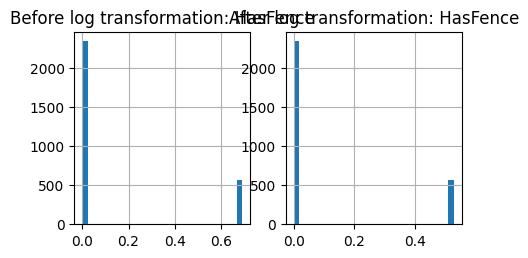

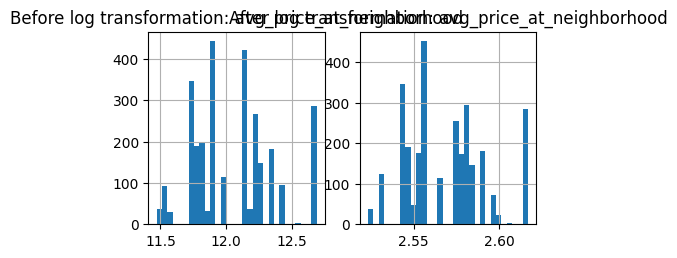

In [119]:
# Assuming X is your DataFrame containing the features
# Select numeric features (you can use df.select_dtypes to select only numeric columns)
Xs = X.copy()
numeric_features = Xs.select_dtypes(include=[np.number]).columns

# Calculate skewness for each numeric feature
skewness = Xs[numeric_features].skew()

# Identify features with skewness > threshold (e.g., > 1 or <-1)
skewed_features = skewness[skewness.abs() > 1].index

print("Skewed Features: ", skewed_features)

# Apply log transformation to skewed features
# Be sure to add a small constant to avoid issues with zero or negative values
Xs[skewed_features] = Xs[skewed_features].apply(lambda x: np.log1p(x))  # log1p(x) = log(x + 1)

# Plot histograms to visualize the transformation
for feature in skewed_features:
    plt.figure(figsize=(5, 2.5))
    
    plt.subplot(1, 2, 1)
    Xs[feature].hist(bins=30)
    plt.title(f"Before log transformation: {feature}")
    
    plt.subplot(1, 2, 2)
    np.log1p(Xs[feature]).hist(bins=30)
    plt.title(f"After log transformation: {feature}")
    
    plt.show()


In [120]:
ordinal_pipeline = Pipeline([
    ("ord_enc", OrdinalEncoder()),
    ("scale", MinMaxScaler())
])

numeric_pipeline = Pipeline([
    ("scale", MinMaxScaler())
])

nominal_pipeline = Pipeline([
    ("ohe", OneHotEncoder(drop="first", handle_unknown="ignore"))
])

preprocessor_log = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, num_cols),
        ("ord", ordinal_pipeline, ordinal_features),
        ("nom", nominal_pipeline, nominal_features)
    ]
)

In [121]:
X_processed_log = preprocessor_log.fit_transform(X)
print(X_processed_log.shape)

(2922, 171)


In [122]:
pca_log = PCA(n_components=0.98)
X_pca_log = pca_log.fit_transform(X_processed)

print("New shape:", X_pca_log.shape)
print("Explained variance ratio:", pca_log.explained_variance_ratio_)
print("Cumulative explained variance:", np.cumsum(pca_log.explained_variance_ratio_))
print("Total explained variance:", np.sum(pca_log.explained_variance_ratio_))

New shape: (2922, 87)
Explained variance ratio: [0.16183914 0.08708635 0.05774722 0.04484464 0.03945823 0.03638605
 0.03390482 0.03239222 0.03024972 0.02807362 0.02634144 0.0257884
 0.02345501 0.02055112 0.01889451 0.01768788 0.01613087 0.01439358
 0.01392886 0.0125801  0.01171799 0.01092774 0.01075202 0.0101035
 0.00869127 0.00802513 0.00775772 0.00752899 0.00737357 0.0072268
 0.00675598 0.00657147 0.00597375 0.00574302 0.00566035 0.00537195
 0.00508944 0.00499854 0.00485657 0.00457439 0.0043228  0.00420507
 0.0040057  0.00388724 0.00378553 0.00364292 0.00363742 0.00355115
 0.00342469 0.00313041 0.00306471 0.00287998 0.00278776 0.00241421
 0.00235398 0.00230218 0.00223231 0.00212247 0.00203591 0.00191148
 0.0018438  0.00169612 0.0015928  0.00154373 0.00151191 0.00149523
 0.00144803 0.00138228 0.00134805 0.00127756 0.00123298 0.00119538
 0.00116267 0.00110486 0.00107489 0.00102704 0.00100131 0.00097117
 0.00091305 0.0009102  0.00088723 0.00087276 0.00084529 0.00079708
 0.00077588 0.000

In [10]:
pre_normalized = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("ord", OrdinalEncoder(), ordinal_features),
        ("nom", OneHotEncoder(drop="first", handle_unknown="ignore"), nominal_features)
    ]
)

norm_pipeline = Pipeline([
    ("prep", pre_normalized),   # encoding
    ("norm", Normalizer())      # row-wise normalization
])

In [11]:
X_normalized = norm_pipeline.fit_transform(X)
print(X_normalized.shape)

(2922, 171)


In [12]:
nfeature_names = pre_normalized.get_feature_names_out()
nX_processed_df = pd.DataFrame(X_normalized, columns=nfeature_names)
ncat_cols = nX_processed_df.select_dtypes(include=["object", "category"]).columns.tolist()
nnumerical = nX_processed_df.select_dtypes(include=[np.number]).columns.tolist()
print(ncat_cols)
print(nnumerical)

[]
['num__MS SubClass', 'num__Lot Frontage', 'num__Lot Area', 'num__Street', 'num__Overall Qual', 'num__Overall Cond', 'num__Year Built', 'num__Year Remod/Add', 'num__Exter Qual', 'num__Exter Cond', 'num__Bsmt Qual', 'num__Bsmt Cond', 'num__BsmtFin SF 1', 'num__BsmtFin SF 2', 'num__Bsmt Unf SF', 'num__Total Bsmt SF', 'num__Heating QC', 'num__Central Air', 'num__1st Flr SF', 'num__2nd Flr SF', 'num__Low Qual Fin SF', 'num__Gr Liv Area', 'num__Bsmt Full Bath', 'num__Bsmt Half Bath', 'num__Full Bath', 'num__Half Bath', 'num__Bedroom AbvGr', 'num__Kitchen AbvGr', 'num__Kitchen Qual', 'num__TotRms AbvGrd', 'num__Garage Yr Blt', 'num__Garage Cars', 'num__Garage Area', 'num__Garage Qual', 'num__Garage Cond', 'num__Wood Deck SF', 'num__Open Porch SF', 'num__Enclosed Porch', 'num__3Ssn Porch', 'num__Screen Porch', 'num__Misc Val', 'num__Mo Sold', 'num__Yr Sold', 'num__HasFence', 'num__GrLivArea_winsor', 'num__avg_price_at_neighborhood', 'ord__Lot Shape', 'ord__Utilities', 'ord__Land Slope', 'or

In [13]:
npca = PCA(n_components=0.98)
nX_pca = npca.fit_transform(X_normalized)

print("New shape:", nX_pca.shape)
print("Explained variance ratio:", npca.explained_variance_ratio_)
print("Cumulative explained variance:", np.cumsum(npca.explained_variance_ratio_))
print("Total explained variance:", np.sum(npca.explained_variance_ratio_))

New shape: (2922, 6)
Explained variance ratio: [0.91106679 0.03475669 0.01328777 0.01063595 0.00730927 0.00700764]
Cumulative explained variance: [0.91106679 0.94582348 0.95911126 0.9697472  0.97705647 0.98406411]
Total explained variance: 0.9840641096958137


In [15]:
cum_n = np.cumsum(npca.explained_variance_ratio_)

n_95n = np.argmax(cum_n >= 0.95) + 1
print("Components for 95% variance:", n_95n)

Components for 95% variance: 3


In [17]:
pca_n_95n = PCA(n_components=n_95n)

X_pca_95n = pca_n_95n.fit_transform(X_normalized)

print("Shapes: ", X_pca_95n.shape)

Shapes:  (2922, 3)


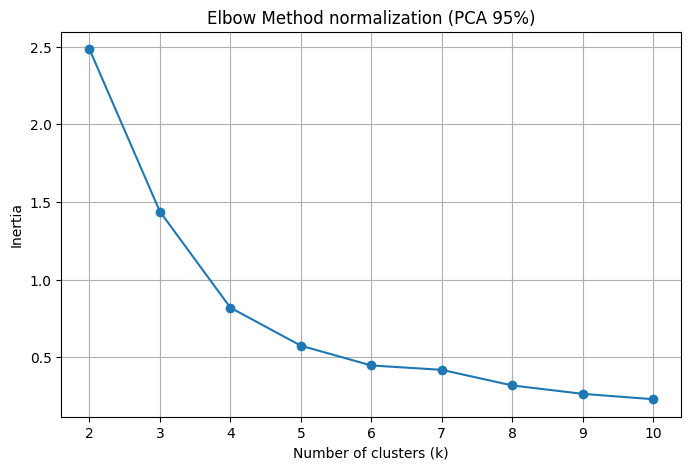

In [18]:
inertias = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_pca_95n)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o')
plt.title('Elbow Method normalization (PCA 95%)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()

In [19]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
labels = kmeans.fit_predict(X_pca_95n)
np.bincount(labels)

array([1224,    5, 1600,   93])

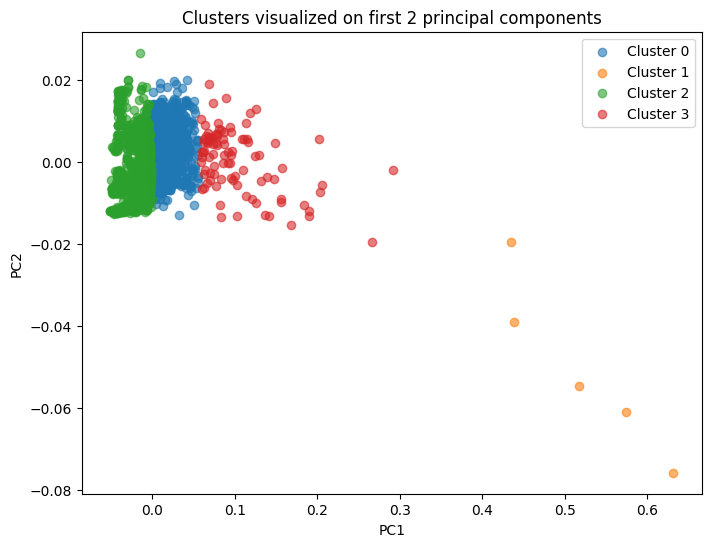

In [20]:
plt.figure(figsize=(8,6))
for cluster in np.unique(labels):
    plt.scatter(
        X_pca_95n[labels==cluster, 0], 
        X_pca_95n[labels==cluster, 1], 
        label=f"Cluster {cluster}", alpha=0.6
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters visualized on first 2 principal components")
plt.legend()
plt.show()

In [22]:
score = silhouette_score(X_pca_95n, labels)
print("Silhouette score:", score)

Silhouette score: 0.4732582346892423


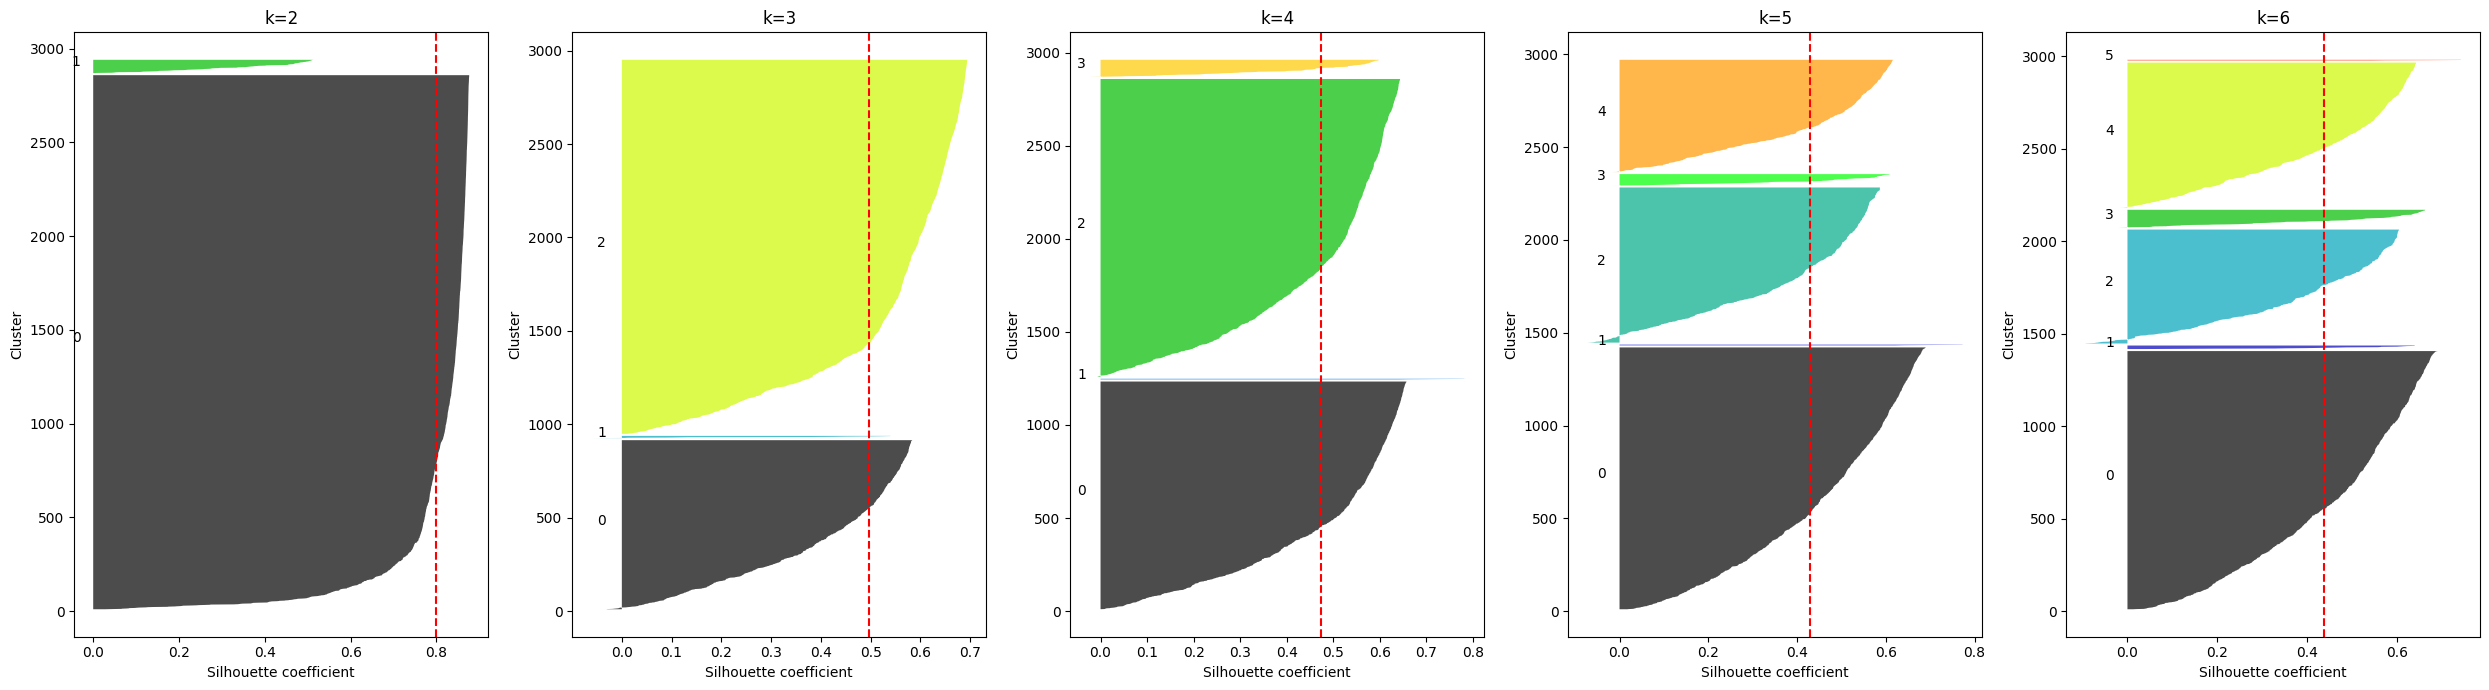

In [24]:
# cluster quality visualization
k_values = [2, 3, 4, 5, 6]
n_k = len(k_values)
fig, axes = plt.subplots(1, n_k, figsize=(5*n_k, 7))

for ax, k in zip(axes, k_values):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(X_pca_95n)
    
    silhouette_vals = silhouette_samples(X_pca_95n, cluster_labels)
    y_lower = 10
    
    for i in range(k):
        ith_silhouette = silhouette_vals[cluster_labels == i]
        ith_silhouette.sort()
        y_upper = y_lower + len(ith_silhouette)
        color = cm.nipy_spectral(float(i)/k)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_silhouette, facecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5*len(ith_silhouette), str(i))
        y_lower = y_upper + 10
    
    ax.axvline(x=np.mean(silhouette_vals), color="red", linestyle="--")
    ax.set_title(f"k={k}")
    ax.set_xlabel("Silhouette coefficient")
    ax.set_ylabel("Cluster")

plt.tight_layout()
plt.show()

In [26]:
loadings = pca_n_95n.components_.T * np.sqrt(pca_n_95n.explained_variance_)
loadings_df = pd.DataFrame(
    loadings,
    columns=[f"PC{i+1}" for i in range(loadings.shape[1])],
    index= nnumerical
)

loadings_df.head()

,PC1,PC2,PC3
num__MS SubClass,-4.509025e-05,0.000137,-1.144366e-04
num__Lot Frontage,6.925406e-05,0.000068,3.603130e-05
num__Lot Area,3.553515e-02,-0.000022,7.603530e-04
num__Street,2.918732e-07,0.000002,-3.512730e-07
num__Overall Qual,5.554246e-07,0.000006,-1.139112e-06


In [27]:
def top_features(pc, n=10):
    sorted_loadings = loadings_df[pc].abs().sort_values(ascending=False).head(n)
    return loadings_df[pc].loc[sorted_loadings.index].head(n)

print(top_features("PC1", 10))
print('\n')
print(top_features("PC2", 10))

num__Lot Area                     0.035535
num__avg_price_at_neighborhood   -0.006569
num__Gr Liv Area                  0.000862
num__1st Flr SF                   0.000824
num__GrLivArea_winsor             0.000798
num__Yr Sold                      0.000704
num__Year Remod/Add               0.000672
num__Garage Yr Blt                0.000652
num__Year Built                   0.000638
num__Total Bsmt SF                0.000428
Name: PC1, dtype: float64


num__Yr Sold                      0.003195
num__Year Remod/Add               0.003101
num__Year Built                   0.003021
num__Garage Yr Blt                0.002880
num__GrLivArea_winsor             0.001837
num__Gr Liv Area                  0.001815
num__avg_price_at_neighborhood    0.001801
num__1st Flr SF                   0.001078
num__Total Bsmt SF                0.000746
num__2nd Flr SF                   0.000695
Name: PC2, dtype: float64


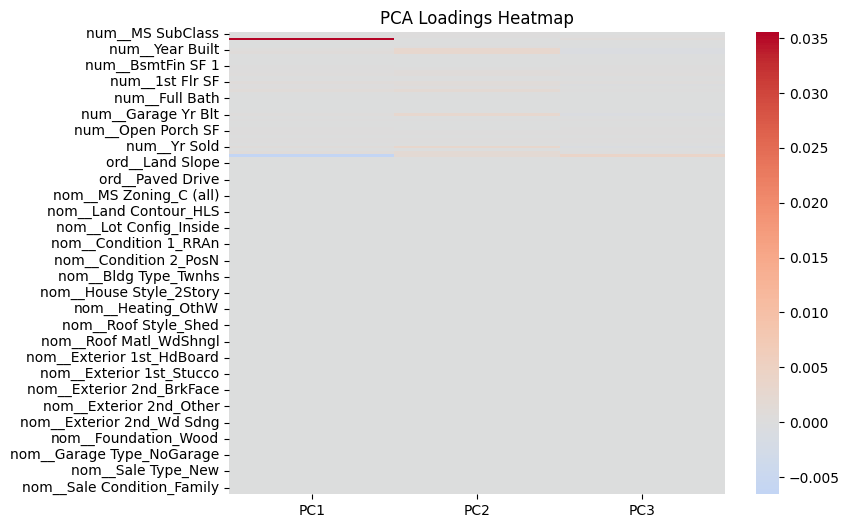

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(loadings_df, cmap="coolwarm", center=0)
plt.title("PCA Loadings Heatmap")
plt.show()